In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data_file_path = "../data/final_0_80509.csv"

In [2]:
df = pd.read_csv(data_file_path,parse_dates=True, low_memory=False)

In [3]:
'''
    Index,AppID,Title,Initial_Price,Final_Price,Discount_Percent,Developers,Publishers,Genres,Categories,Required_Age,Achievements,Release_Date,Metacritic_score,DLC_Flag,Win_Flag,Mac_Flag,Linux_Flag,OS,Processor,Memory,Graphics,DirectX,Storage,Current_Players,Interface_Languages,Audio_Languages,Subtitle_Languages,Positive_Reviews,Negative_Reviews,Total_Reviews,Overall_Review_Summary,Recent_Reviews,Recent_Review_Summary,Mature_Content_Desc,Awards,Curators
'''

# Required Cols
data = df[["Title","Genres","Categories","Awards", "Curators"]]
data["Awards"] = data["Awards"].fillna("")
data.dropna(inplace = True)
data.reset_index(inplace = True)
data

C:\Users\user\AppData\Local\Temp\ipykernel_12188\1278008755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Awards"] = data["Awards"].fillna("")
C:\Users\user\AppData\Local\Temp\ipykernel_12188\1278008755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


,index,Title,Genres,Categories,Awards,Curators
0,0,Galactic Bowling,"['Casual', 'Indie', 'Sports']","['Single-player', 'Multi-player', 'Steam Achie...",,6.0
1,1,Train Bandit,"['Action', 'Indie']","['Single-player', 'Steam Achievements', 'Full ...",,8.0
2,2,Jolt Project,"['Action', 'Adventure', 'Indie', 'Strategy']",['Single-player'],,1.0
3,3,Henosis™,"['Adventure', 'Casual', 'Indie']","['Single-player', 'Full controller support']",,5.0
4,4,Two Weeks in Painland,"['Adventure', 'Indie']","['Single-player', 'Steam Achievements']",,2.0
...,...,...,...,...,...,...
61666,80483,RPG Maker MV - DS+ Resource Pack,"['Design & Illustration', 'Web Publishing']","['Downloadable Content', 'Steam Trading Cards'...",,1.0
61667,80488,Pinball FX3 - Balls of Glory Pinball,['Simulation'],"['Single-player', 'Downloadable Content', 'Ste...",,1.0
61668,80502,Devoid Prototype,"['Action', 'Adventure', 'RPG', 'Simulation', '...","['Single-player', 'Multi-player', 'Co-op', 'Sh...",,4.0
61669,80506,Car Mechanic Simulator 2018 - Porsche DLC,"['Racing', 'Simulation']","['Single-player', 'Downloadable Content', 'Ste...",,1.0


In [4]:

from pprint import pprint

genres_awards = {}
categories_awards = {}
genres_curators = {}
categories_curators = {}

for i in range(61671):
    for genre in eval(data["Genres"][i]):
        if genre not in genres_awards:
            genres_awards[genre] = 0
        if genre not in genres_curators:
            genres_curators[genre] = 0
            
        genres_awards[genre] += bool(data["Awards"][i])
        genres_curators[genre] += data["Curators"][i]

    for category in eval(data["Categories"][i]):
        if category not in categories_awards:
            categories_awards[category] = 0
        if category not in categories_curators:
            categories_curators[category] = 0
            
        categories_awards[category] += bool(data["Awards"][i])
        categories_curators[category] += data["Curators"][i]


print("Genre Awards",genres_awards) 
print("Category Awards ",categories_awards)
print("Genres Curators ",genres_curators)
print("Category Curators ",categories_curators)

Genre Awards {'Casual': 2, 'Indie': 1, 'Sports': 1, 'Action': 6, 'Adventure': 4, 'Strategy': 0, 'RPG': 0, 'Simulation': 1, 'Free to Play': 3, 'Early Access': 0, 'Racing': 0, 'Massively Multiplayer': 1, 'Education': 0, 'Sexual Content': 0, 'Nudity': 0, 'Violent': 0, 'Gore': 0, 'Animation & Modeling': 0, 'Design & Illustration': 0, 'Utilities': 0, 'Game Development': 0, 'Web Publishing': 0, 'Audio Production': 0, 'Video Production': 0, 'Software Training': 0, 'Accounting': 0, 'Photo Editing': 0, 'Movie': 0, 'Documentary': 0, 'Episodic': 0, 'Short': 0, 'Tutorial': 0, '360 Video': 0}
Category Awards  {'Single-player': 4, 'Multi-player': 4, 'Steam Achievements': 6, 'Partial Controller Support': 2, 'Full controller support': 3, 'Steam Leaderboards': 0, 'Remote Play on Phone': 4, 'Remote Play on Tablet': 5, 'Remote Play on TV': 2, 'Steam Cloud': 1, 'Steam Trading Cards': 3, 'Shared/Split Screen': 0, 'Cross-Platform Multiplayer': 0, 'In-App Purchases': 4, 'Remote Play Together': 0, 'Co-op': 3,

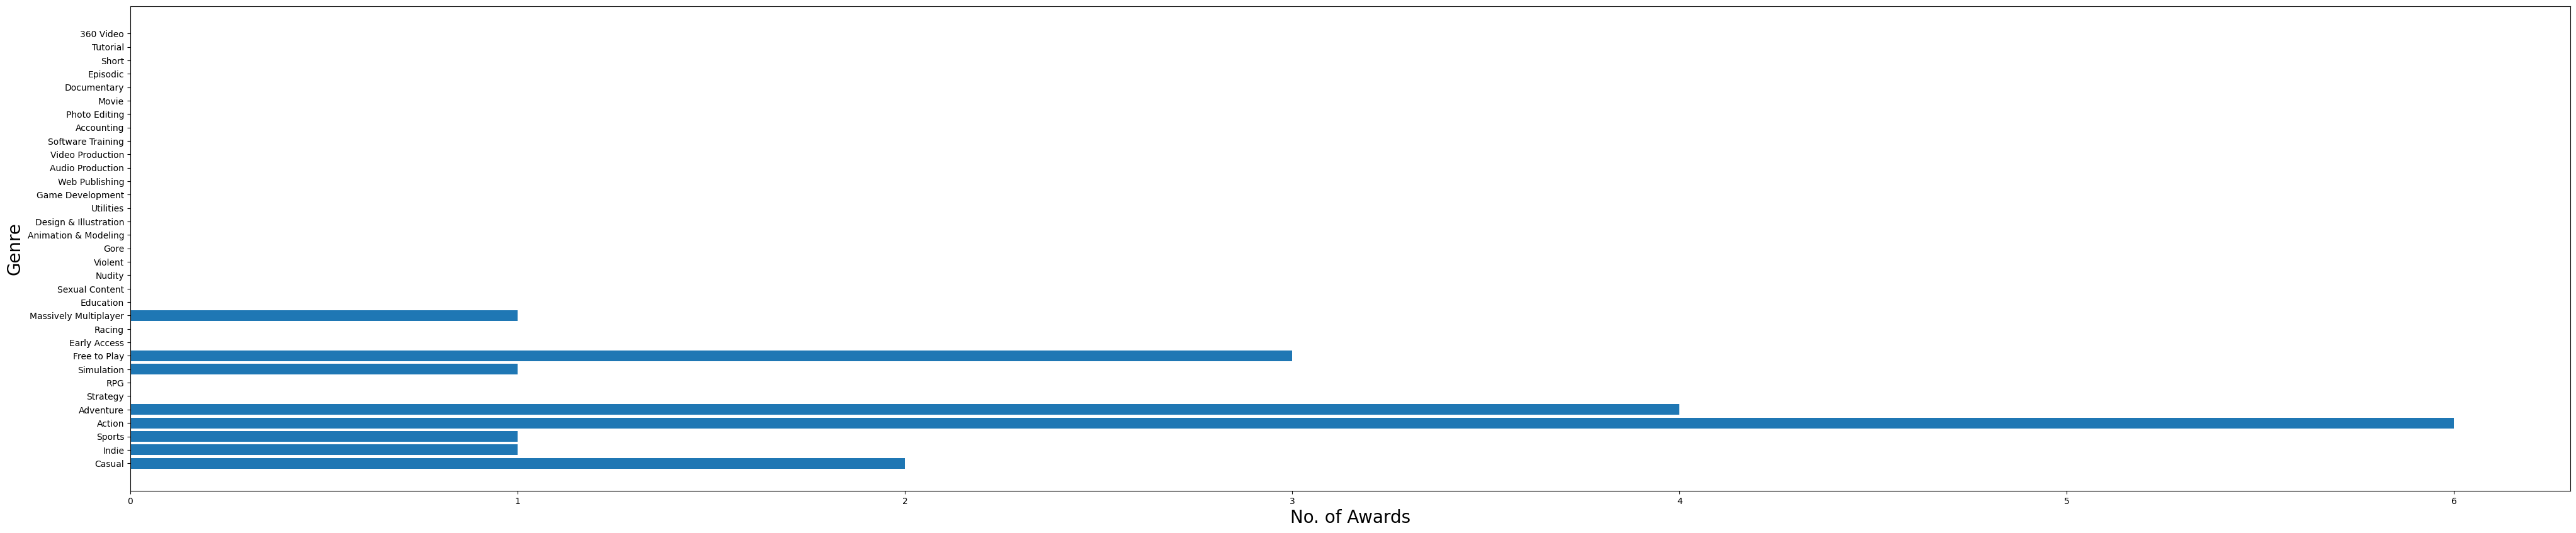

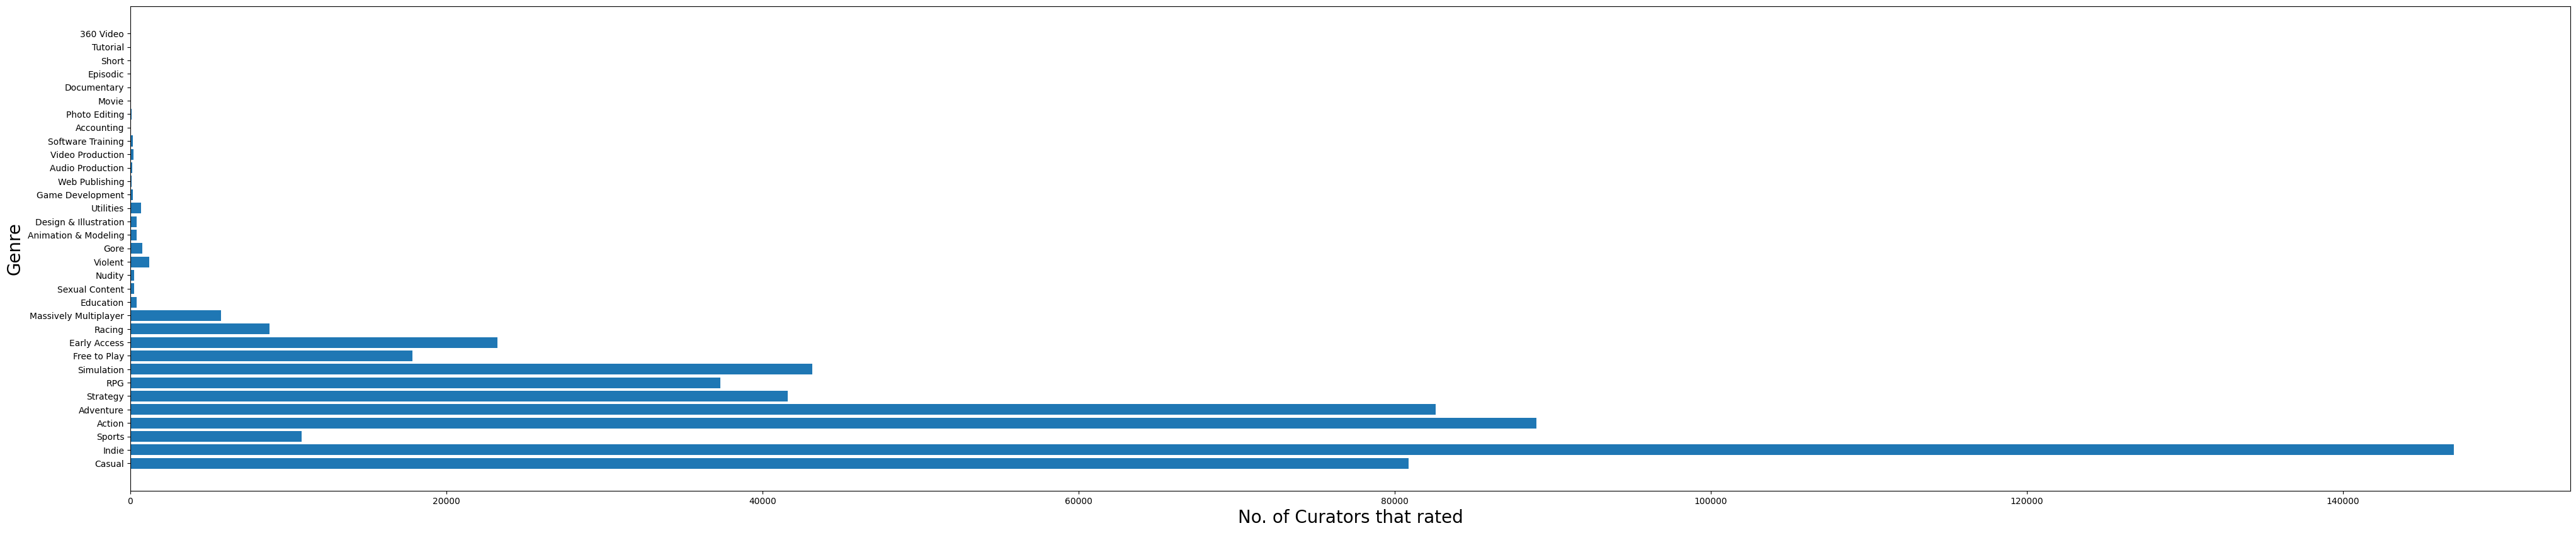

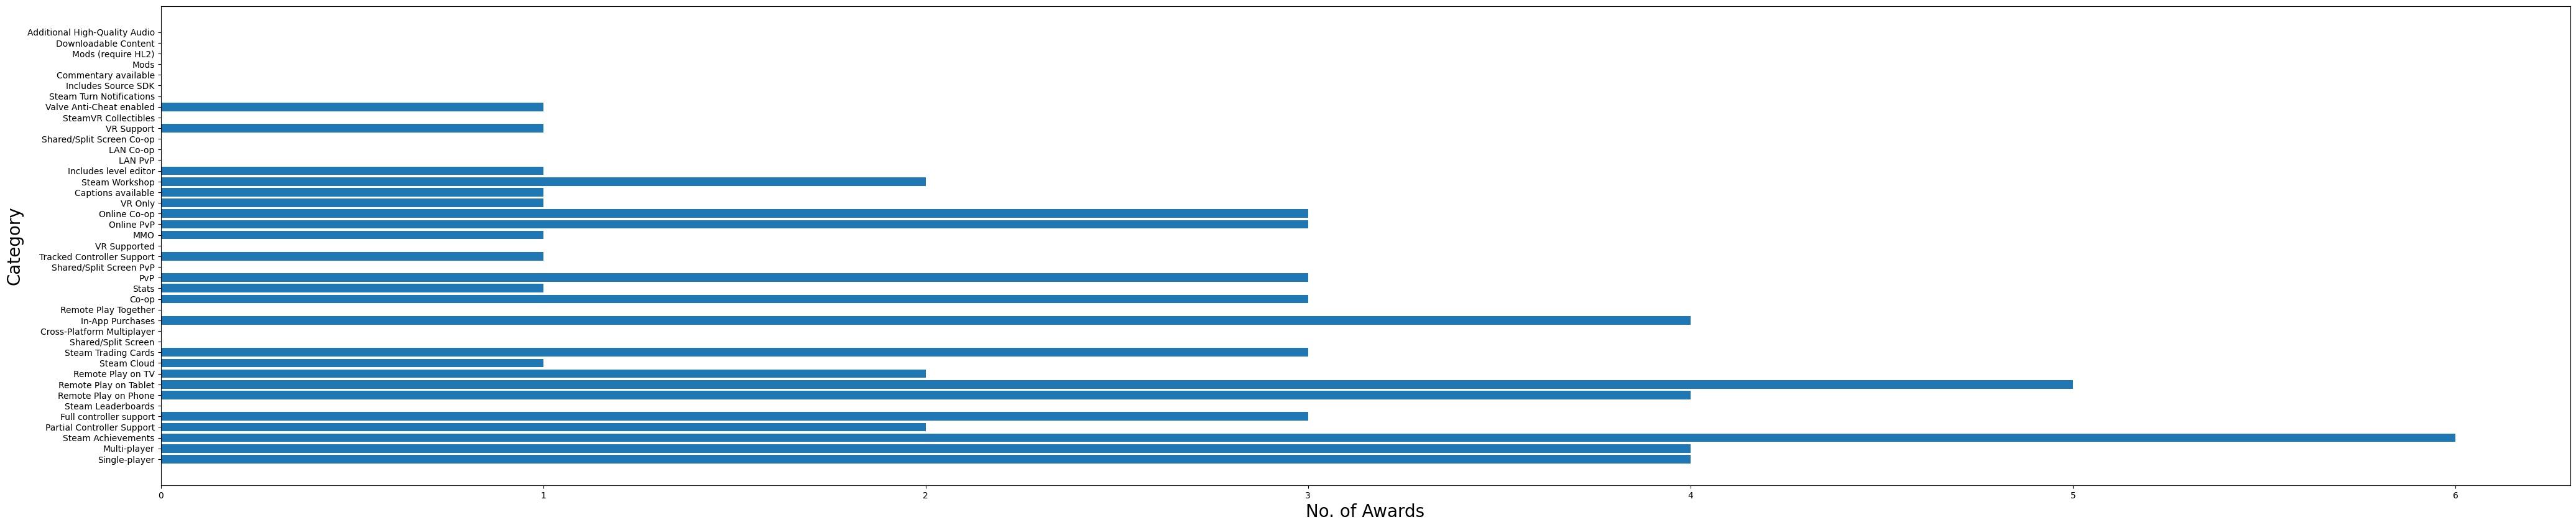

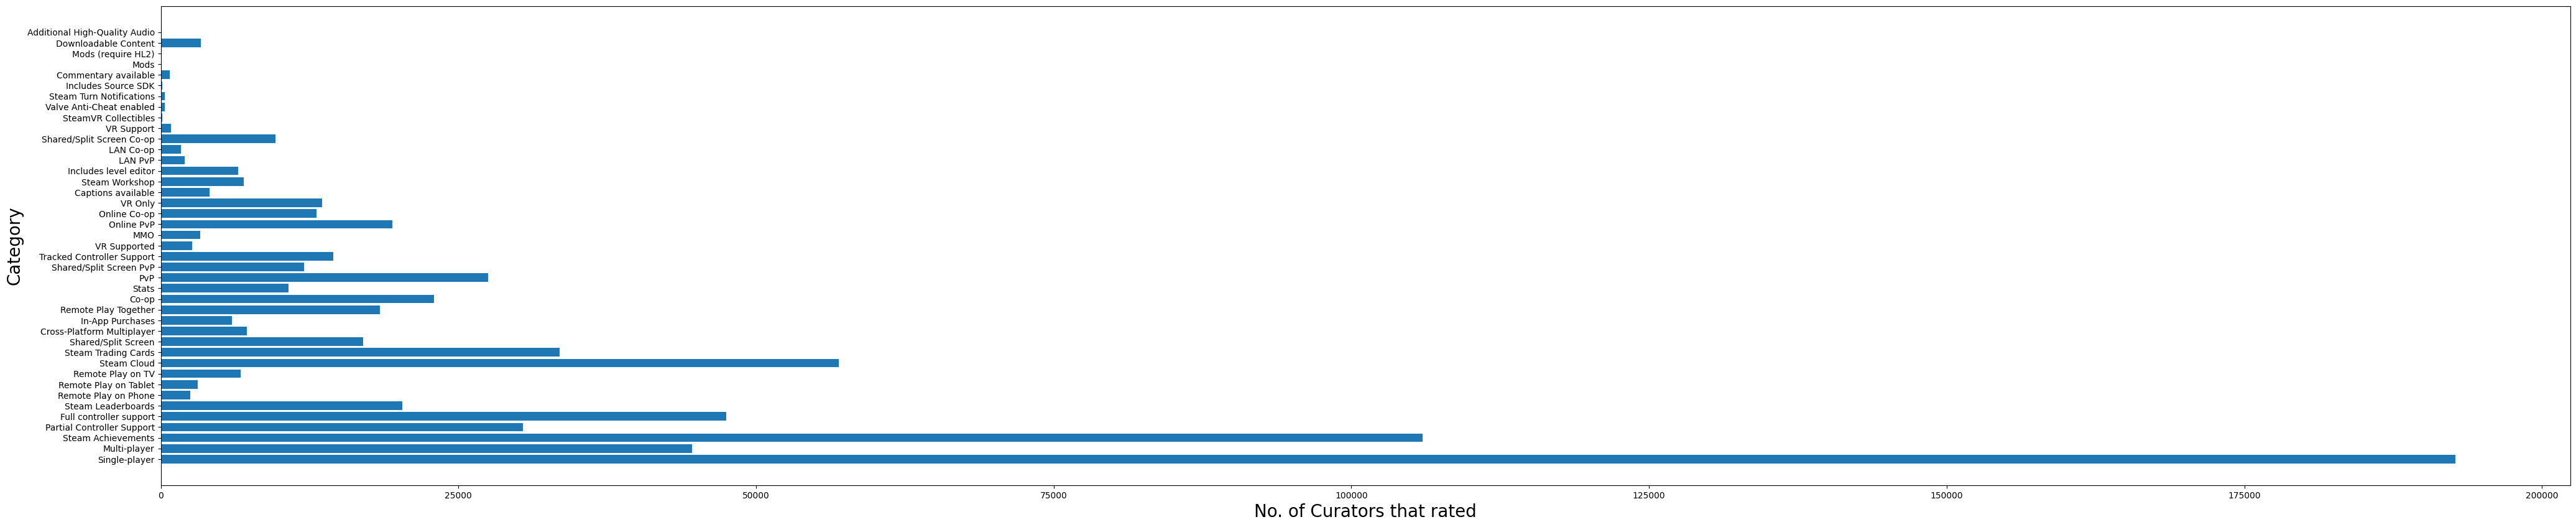

In [53]:

# Plotting  charts for distribution
# Genre Awards
plt.figure(figsize=(50,10))
plt.barh(list(genres_awards.keys()), list(genres_awards.values()))
plt.xlabel("No. of Awards", fontsize=20)
plt.ylabel("Genre", fontsize=20)
plt.show()

# Genre Curators
plt.figure(figsize=(50,10))
plt.barh(list(genres_curators.keys()), list(genres_curators.values()))
plt.xlabel("No. of Curators that rated", fontsize=20)
plt.ylabel("Genre", fontsize=20)

plt.show()

# Category Awards
plt.figure(figsize=(50,10))
plt.barh(list(categories_awards.keys()), list(categories_awards.values()))
plt.xlabel("No. of Awards", fontsize=20)
plt.ylabel("Category", fontsize=20)
plt.show()

# Category Curators
plt.figure(figsize=(50,10))
plt.barh(list(categories_curators.keys()), list(categories_curators.values()))
plt.xlabel("No. of Curators that rated", fontsize=20)
plt.ylabel("Category", fontsize=20)
plt.show()

## To illustrate the factors contributing to negative reviews of a game, such as whether memory or pricing are influencing its decline.

### Inferences

    1. 'Action' (6) is the most awarded genre and 'Adventure'(4) after it
    2. 'Indie'(147,033) Genre got most rated by Curators and 'Action'(88,972) after that
    3. For Category 'Steam Achievements'(6) is the most awarded category and followed by 'Tablet Games' (5)
    4. 'Single Player' (192,730) category got most rated by Curators followed by 'Steam Achievments'(105,961)